<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2 (2023)</h1>

-----

|**Maximum Marks**         |**100 marks**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **11.59M, Friday, May 19th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this assignment:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment_2_2023_uXXXXXXX.ipynb` (where uXXXXXXX is your uid) [Please note that if you have to pull from the upstream repo you will need to change the name back first and add your uid after the pull again]
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any violation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them. You can change these to Markdown cells where necessary (e.g. you may need to include some figures in your answer).
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

**Several notes on printing and plotting**
* When writing codes to print, your codes should <u>**include the relevant units and/or give relevant description**</u> of what you are printing. 

* A professional plot typically has the following characteristics:

    * Clear and concise labeling: A professional plot should have clear and concise labeling of the x and y axes, as well as a clear title that conveys the purpose of the plot.

    * Appropriate scales: The scales on the x and y axes should be appropriate for the data being presented. This means that the scales should be chosen so that the data is not too compressed or stretched out, and so that important features of the data are easily visible.

    * Appropriate plot type: The plot type should be appropriate for the data being presented. For example, if the data is continuous, a line plot or a scatter plot may be appropriate. If the data is categorical, a bar chart or a pie chart may be more appropriate.

    * Clarity: A professional plot should be visually clear and easy to interpret. This means that unnecessary elements should be removed, colors should be used judiciously, and the plot should be free of clutter.

    * Consistency: A professional plot should be consistent in its formatting with other plots that may be presented in the same report. This means that font sizes, line widths, and colors should be consistent across all plots.

### Enter your Student ID below:

## Data Science (40 marks)

The World Development Indicators from https://data.worldbank.org/ is a compilation of relevant, high-quality, and internationally comparable statistics about global development and the fight against poverty. The database contains 1,400 time series indicators for 217 economies and more than 40 country groups, with data for many indicators going back more than 50 years. Herein, we adopt a part of the data for the following questions. Specifically, there are 20 years of data with 20 time series indicators (may also referred to as attributes), namely: 

  - GDP (current US$)
  - GDP growth (annual %)
  - GDP per capita (current LCU)
  - Exports of goods and services (% of GDP)
  - Agriculture, forestry, and fishing, value added (% of GDP)
  - Central government debt, total (% of GDP)
  - Trade (% of GDP)
  - Tax revenue (% of GDP)
  - Services, value added (% of GDP)
  - CO2 emissions (kg per PPP \$ of GDP)
  - Compulsory education, duration (years)
  - Government expenditure on education, total (% of government expenditure)
  - Primary education, duration (years)
  - Employment to population ratio, 15+, total (%) (modeled ILO estimate)
  - Population ages 15-64, total
  - Population ages 65 and above, total
  - Population ages 65 and above (% of total population)
  - Population, female (% of total population)
  - Population, male (% of total population)
  - Population, total

In [1]:
## Package Imports
# Feel free to import other modules, provided they are a part of the standard conda distribution.
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier      
from sklearn.preprocessing import LabelEncoder          
from sklearn.preprocessing import StandardScaler       
from sklearn.model_selection import train_test_split    
from sklearn.metrics import confusion_matrix
from scipy import stats
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from functools import reduce
# decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

C:\Users\Andrew Ha\AppData\Local\Temp\ipykernel_19492\4205738966.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1.0) Import the Data (0 marks)
- The data file is called `WorldPartialData.csv` in the data directory.
- Processing the data accordingly and make them ready for the use in this question. For example, you may make the years and countries as rows and the 20 time series indicators as columns.

In [2]:
# YOUR CODE HERE
df = pd.read_csv('data/WorldPartialData.csv')
# Drop rows and columns that will be unused.
df_part = df.iloc[:4340]
df_dropped = df_part.drop(columns=['Country Code', 'Series Code'])
# List of indicators
indicators = ['GDP (current US$)', 
              'GDP growth (annual %)', 
              'Exports of goods and services (% of GDP)', 
              'Trade (% of GDP)', 
              'Services, value added (% of GDP)', 
              'Government expenditure on education, total (% of government expenditure)',
              'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
              'Population ages 15-64, total',
              'Population, total']

# make list to store datas
lists = []

for indicator in indicators:
    # will find each lines of indicator 
    df_indicator = df_dropped[df_dropped['Series Name'].isin([indicator])]
    df_indicator = df_indicator.drop(columns=['Series Name'])
    df_indicator.columns = df_indicator.columns.str.replace(' \[YR.*\]', '')
    # Melt the DataFrame to have one row per year per series per country
    df_indicator = df_indicator.melt(id_vars=['Country Name'], var_name='Year', value_name=indicator)
    # Extract year from "Year" column
    df_indicator['Year'] = df_indicator['Year'].str.extract('(\d+)').astype(int)
    lists.append(df_indicator)
    
# Merge all datas on 'Country Name' and 'Year'
df_final = reduce(lambda left,right: pd.merge(left,right,on=['Country Name', 'Year']), lists)
df_final.set_index(['Country Name', 'Year'], inplace=True)
# Replace '..' with np.nan
df_final.replace('..', np.nan, inplace=True)

# change the columns into numeric value
for col in df_final.columns:
    df_final[col] = pd.to_numeric(df_final[col])

# will fill nan values in mean of each columns - I did this because it will be better to put the mean value instead drop all of the datas 
# which doesn't has the exact values, or doesn't have the value to predict
for col in df_final.columns:
    df_final[col].fillna(df_final[col].mean(), inplace=True)

df_final['GDP per capita (current US$)'] = df_final['GDP (current US$)'] / df_final['Population, total']    

df_final

,,GDP (current US$),GDP growth (annual %),Exports of goods and services (% of GDP),Trade (% of GDP),"Services, value added (% of GDP)","Government expenditure on education, total (% of government expenditure)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Population ages 15-64, total","Population, total",GDP per capita (current US$)
Country Name,Year,,,,,,,,,,
Australia,2002,3.955808e+11,3.993590,20.737956,41.471680,63.998048,14.683509,59.324001,13076482,19495210,2.029118e+04
Afghanistan,2002,3.854235e+09,3.237292,43.083999,91.917283,36.151155,14.683509,43.009998,10031307,21000256,1.835328e+02
Albania,2002,4.348068e+09,4.536524,20.945616,68.525068,43.776515,9.886920,48.943001,1934852,3051010,1.425124e+03
Algeria,2002,5.676036e+10,5.600000,35.504537,61.134171,36.052462,14.683509,32.087002,20206328,31624696,1.794811e+03
American Samoa,2002,5.120000e+08,3.237292,101.171875,210.937500,55.232193,14.683509,56.061063,33248,58177,8.800729e+03
...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),2021,3.251122e+11,3.237292,43.083999,91.917283,55.232193,14.683509,46.506001,64318,105870,3.070863e+06
West Bank and Gaza,2021,1.803680e+10,7.050451,17.631731,74.431717,55.232193,14.683509,31.924999,2824582,4922749,3.663969e+03
"Yemen, Rep.",2021,3.251122e+11,3.237292,43.083999,91.917283,55.232193,14.683509,32.719002,18944277,32981641,9.857370e+03


### 1.1) Classification using Decision trees for COMP2420 Students  (20 marks)

Part 1: Train a Decision Tree model using this dataset to predict whether a given country has GDP per capita over 30,000. You may consider the following as a hints. (12 marks)

- Do you need to import other packages?
- How did you prepare the dataset for this task?
- What are the hyperparameters of your model?
- How did you decide on the hyperparameters for your model? 
- Visualise the decision tree that you trained (display the tree in the notebook.)

Part 2: Based on Part 1, specify the depth and re-train a decision tree with depth 3 and another one with depth 4. Calculate the values of Gini impurity and Gini gain of the decision trees for both training and testing sets. Compare and discuss the results. (8 marks)

In [3]:
# YOUR CODE HERE
# Part 1: Train a Decision Tree model using this dataset to predict whether a given country has GDP per capita over 30,000. You may consider the following as a hints. (10 marks)
df_final['GDP Per Capita > 30K'] = (df_final['GDP per capita (current US$)'] > 30000).astype(int)

# Define the feature matrix X and the target y
df_final_X = df_final.drop(['GDP per capita (current US$)', 'GDP Per Capita > 30K'], axis=1)
df_final_y = df_final['GDP Per Capita > 30K']
# split, fit, score
train_x, test_x, train_y, test_y = train_test_split(df_final_X, df_final_y, test_size=0.2)

dt = DecisionTreeClassifier()
dt_ttnc_class = dt.fit(train_x, train_y)

print("Training Score:", dt_ttnc_class.score(train_x, train_y))
print("Testing Score: ", dt_ttnc_class.score(test_x, test_y))

Training Score: 1.0
Testing Score:  0.9746543778801844


In [4]:
# Part 2: Based on Part 1, specify the depth and re-train a decision tree with depth 3 and another one with depth 4. 
# Calculate the values of Gini impurity and Gini gain of the decision trees for both training and testing sets. 
# Compare and discuss the results. (8 marks)

dt_depth3 = DecisionTreeClassifier(max_depth=3)
dt_3 = dt_depth3.fit(train_x, train_y)
dt_depth4 = DecisionTreeClassifier(max_depth=4)
dt_4 = dt_depth4.fit(train_x, train_y)

# Calculate Gini Impurity for the labels (training set)
label_gini_train = 0
for y in train_y.unique():
    pc = sum(train_y==y)/len(train_y)
    label_gini_train += pc * (1-pc)
print(f'Training Set: Gini Impurity of the Labels: {label_gini_train:.4f}')

# Calculate Gini Impurity for the labels (testing set)
label_gini_test = 0
for y in test_y.unique():
    pc = sum(test_y==y)/len(test_y)
    label_gini_test += pc * (1-pc)
print(f'Testing Set: Gini Impurity of the Labels: {label_gini_test:.4f}')

# Calculate Gini Impurity for the Decision Trees and Gini Gain
for dt, depth in zip([dt_3, dt_4], [3, 4]):
    # Training set
    leaf_id_train = dt.apply(train_x)
    prob_positive_train = dt.predict_proba(train_x)[:, 0]
    dt_gini_train = 0
    for leaf_node in np.unique(leaf_id_train):
        num_of_sample = sum(leaf_id_train==leaf_node)
        pc = sum(prob_positive_train[leaf_id_train==leaf_node]) / num_of_sample
        dt_gini_train += (pc * (1-pc)) * num_of_sample/len(train_x)
    print(f'Training Set: Gini Impurity of the Decision Tree of depth {depth}: {dt_gini_train:.4f}')
    print(f'Training Set: Gini Gain of the Decision Tree of depth {depth}: {label_gini_train - dt_gini_train:.4f}')

    # Testing set
    leaf_id_test = dt.apply(test_x)
    prob_positive_test = dt.predict_proba(test_x)[:, 0]
    dt_gini_test = 0
    for leaf_node in np.unique(leaf_id_test):
        num_of_sample = sum(leaf_id_test==leaf_node)
        pc = sum(prob_positive_test[leaf_id_test==leaf_node]) / num_of_sample
        dt_gini_test += (pc * (1-pc)) * num_of_sample/len(test_x)
    print(f'Testing Set: Gini Impurity of the Decision Tree of depth {depth}: {dt_gini_test:.4f}')
    print(f'Testing Set: Gini Gain of the Decision Tree of depth {depth}: {label_gini_test - dt_gini_test:.4f}')

Training Set: Gini Impurity of the Labels: 0.3267
Testing Set: Gini Impurity of the Labels: 0.3367
Training Set: Gini Impurity of the Decision Tree of depth 3: 0.0603
Training Set: Gini Gain of the Decision Tree of depth 3: 0.2665
Testing Set: Gini Impurity of the Decision Tree of depth 3: 0.0613
Testing Set: Gini Gain of the Decision Tree of depth 3: 0.2754
Training Set: Gini Impurity of the Decision Tree of depth 4: 0.0351
Training Set: Gini Gain of the Decision Tree of depth 4: 0.2916
Testing Set: Gini Impurity of the Decision Tree of depth 4: 0.0344
Testing Set: Gini Gain of the Decision Tree of depth 4: 0.3023


### 1.2) Clustering for COMP2420 Students  (20 marks)

Part 1: Based on the 20 years's ***GDP per capita (current LCU)***, design and implement a K-means clustering algorithm to cluster the countries. You may consider the following as a hints. (10 marks)

- Do you need to import other packages?
- How did you prepare the dataset for this task?
- How many neighbors K, did you use for your model? 
- What are the values of the other hyperparameters of your model? 
- How did you decide on the hyper-parameters of your model? 

Part 2: Perform the Elbow method to find the optimal K. Show the plot of total of the within cluster sum of squares with respect to K. (5 marks)

Part 3: Perform the Silhouette method to find the optimal K. Show the plot of Silhouette width with respect to K. (5 marks)



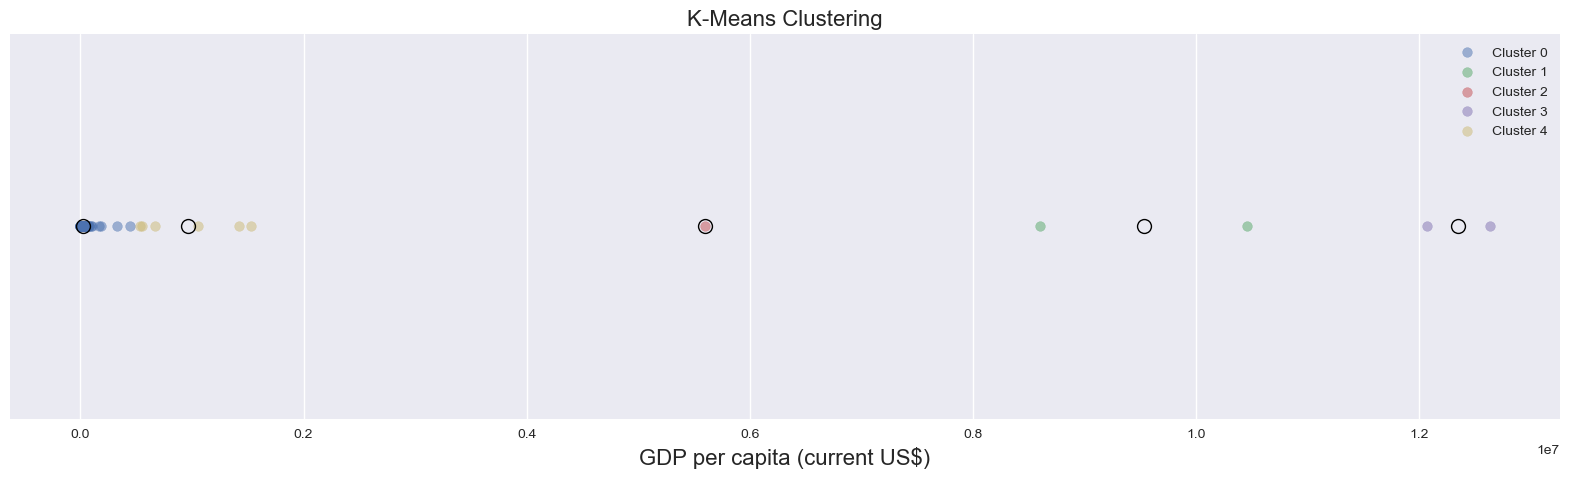

In [5]:
# YOUR CODE HERE
# Part 1: Based on the 20 years's GDP per capita, design and implement a K-means clustering algorithm to cluster the countries. You may consider the following as a hints. (10 marks)
df_gdp_per_capita = df_final[['GDP per capita (current US$)']].copy()
# make 20 year's data into one row and calculate mean of 20 year's data by country
df_gdp_mean = df_gdp_per_capita.groupby('Country Name')['GDP per capita (current US$)'].mean().reset_index()
X = df_gdp_mean['GDP per capita (current US$)'].values.reshape(-1,1)

# Perform k-means clustering
# I just decide k as 5, because from Elbow method, we can see K=5 is optimal and common used method is Elbow, so I just choose as 5.
km = KMeans(n_clusters=5).fit(X)
labels = km.labels_

plt.figure(figsize=(20,5))
for i in range(5):
   plt.scatter(df_gdp_mean['GDP per capita (current US$)'][labels==i], [0]*sum(labels==i), label=f'Cluster {i}', alpha=0.5)

# Plot cluster centers
for center in km.cluster_centers_:
   plt.plot(center[0], 0, 'ko', markersize=10, markeredgecolor='k', markeredgewidth=1, markerfacecolor='none')

plt.title("K-Means Clustering",size=16)
plt.xlabel('GDP per capita (current US$)', size=16)
plt.yticks([])
plt.legend()
plt.show()



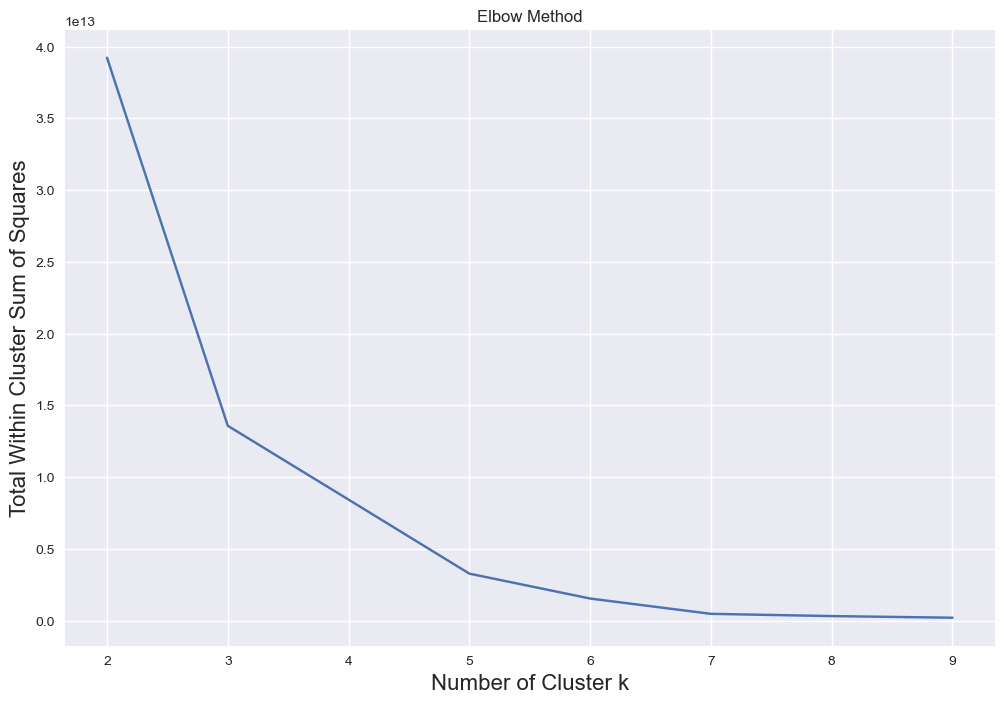

In [6]:
# Part 2: Perform the Elbow method to find the optimal K. Show the plot of total of the within cluster sum of squares with respect to K. (5 marks)
inertias = []
K = range(2, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    inertias.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster k', size=16)
plt.ylabel('Total Within Cluster Sum of Squares', size=16)
plt.show()

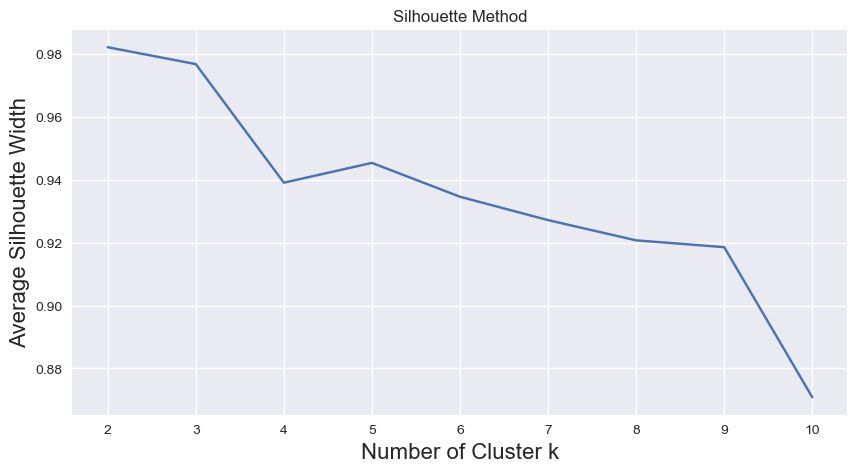

In [7]:
# Part 3: Perform the Silhouette method to find the optimal K. Show the plot of Silhouette width with respect to K. (5 marks)
sil = []

# We are going to compute silhouette scores for k between 2 and 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels))

# Plot silhouette_score vs number of clusters
plt.figure(figsize=(10,5))
plt.plot(range(2, 11), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of Cluster k', size=16)
plt.ylabel('Average Silhouette Width', size=16)
plt.show()


## Data Management
This section of the assignment has been split into two sections, based on the datasets you will be interacting with: **Sakila** and **Rumble**.

### Sakila
To test your SQL muscles, we have provided a database (and the creation scripts) for a sample SQL database called Sakila made available by MySQL under a BSD licence. The Sakila sample database is a fictitious database designed to represent a DVD rental store. The tables of the database include film, film_category, actor, customer, rental, payment and inventory among others.. We have provided the Database diagram in Q3 for reference.

Detailed information about the database can be found on the MySQL website: https://dev.mysql.com/doc/sakila/en/

### Rumble
One of the goals of this course was to introduce you to a multitude of different scenarios and datasets, and this assignment will be no exception.

The WWE Royal Rumble (Further Reading: [Wikipedia](https://en.wikipedia.org/wiki/Royal_Rumble) or [wwe.com](https://www.wwe.com/shows/royalrumble)) is an annual [professional wrestling](https://en.wikipedia.org/wiki/Professional_wrestling) event put on by the [World Wrestling Entertainment (WWE)](https://en.wikipedia.org/wiki/WWE). At the event, the marque match is a 30-man (or now woman!) "battle royale". (If none of this makes sense, don't worry. We're about to explain it.)

#### What is professional wrestling?
Professional Wrestling is a form of entertainment, quite popular in the United States and Japan. "Wrestlers" will "fight" in "matches", which are aimed to combine theater and athleticism. Matches are predetermined, participants are all willing, and the main aim is to entertain the audience. ([Further Reading](https://entertainment.howstuffworks.com/pro-wrestling.htm)).

#### So what is a "Royal Rumble"?
The "Royal Rumble" is a type of match that has 3 rules:
- Everyone gets allocated an entrance number (so, you start with 2 and new entries come in every so often).
- Only way to get rid of someone is to throw them out of the ring.
- Last person standing wins.

#### So, what has this got to do with the assignment?
Good question! All of the above is background information so you understand the dataset. In the interests of assessing your data handling, manipulation and SQL skills, you are going to be implementing an SQL database from the csv data files provided.


In [8]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
#

*****
## Serious SQL (25 marks)
Consider the following scenario.

> You are applying for a job as a database developer for an unnamed wrestling company. Part of the job description includes creating an automation system for running SQL queries. During the hiring process, the interviewers want to ensure you understand the SQL language. They have provided a set of questions to be answered by you, and your responses will later be reviewed by them. They are unwilling to give you access to their real database (which is mysteriously missing), so they have provided an SQLite3 database and asked you to interact with it using Python. 


Based on the above scenario, you have been asked to answer a number of questions to test your skills. You will be using the _Sakila_ database for this question. The database model is as follows:

![sakila](./img/SQLite3_Sakila_Sample_Database_ERD.png)

In the following questions, you will be asked to execute the SQL statements, and explain any reasoning as necessary. Answers to each sub-question should be obtained by a single SQL query **only**. 

**Notes**:
  - There may be slight discrepancies between the above figure and the loaded database.
  - Data can be formatted as raw printed output or a Pandas DataFrame.

In [9]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one;
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

sakila_db = 'data/sqlite-sakila.db'
conn = create_connection(sakila_db) 
cur = conn.cursor()
# remember to close the connection when everything is done

Connection established!


### 2.1: Names of the tables (2 marks)
List the names of the tables found in this database.

In [10]:
# YOUR CODE HERE
query = "SELECT name FROM sqlite_master WHERE type='table';"
df_projects = pd.read_sql_query(query, conn)
display(df_projects)

,name
0,actor
1,country
2,city
3,address
4,language
5,category
6,customer
7,film
8,film_actor
9,film_category


### 2.2: Number of Rentals (2 marks)
List the number of rentals in the database.

In [11]:
# YOUR CODE HERE
query = "SELECT COUNT(*) AS Rentals FROM rental;"
df_projects = pd.read_sql_query(query, conn)
display(df_projects)

,Rentals
0,16044


### 2.3: Inactive Customers (2 marks)
There are fifteen customers who are not active. What are their first and last names?

In [12]:
# YOUR CODE HERE
query = "SELECT first_name, last_name FROM customer WHERE active = 0;"
df_projects = pd.read_sql_query(query, conn)
display(df_projects)

,first_name,last_name
0,SANDRA,MARTIN
1,JUDITH,COX
2,SHEILA,WELLS
3,ERICA,MATTHEWS
4,HEIDI,LARSON
5,PENNY,NEAL
6,KENNETH,GOODEN
7,HARRY,ARCE
8,NATHAN,RUNYON
9,THEODORE,CULP


### 2.4: Cities by Country (4 marks)
What are the counts of cities for each country in the database? Display the country names with the number of cities in each country.

In [13]:
# YOUR CODE HERE
query = """
SELECT country.country, COUNT(city.city) as number_of_cities
FROM city
JOIN country ON city.country_id = country.country_id
GROUP BY country.country
ORDER BY number_of_cities DESC;
"""
df_projects = pd.read_sql_query(query, conn)
display(df_projects)

,country,number_of_cities
0,India,60
1,China,53
2,United States,35
3,Japan,31
4,Mexico,30
...,...,...
104,Australia,1
105,Armenia,1
106,Anguilla,1
107,American Samoa,1


### 2.5: Most rented (4 marks)
Find the name of the top customer in the database as measured by the most money spent.


In [14]:
# YOUR CODE HERE
query = """
SELECT customer.first_name, customer.last_name, SUM(payment.amount) as total_spent
FROM customer
JOIN payment ON customer.customer_id = payment.customer_id 
GROUP BY customer.customer_id
ORDER BY total_spent DESC
LIMIT 1;
"""
df_projects = pd.read_sql_query(query, conn)
display(df_projects)

,first_name,last_name,total_spent
0,KARL,SEAL,221.55


### 2.6: Not returned rentals (2 marks)
Find out how many rentals have not yet been returned.

In [15]:
# YOUR CODE HERE
query = "SELECT COUNT(*) FROM rental WHERE return_date IS NULL;"
df_projects = pd.read_sql_query(query, conn)
display(df_projects)

,COUNT(*)
0,183


### 2.7: Finding an Actor (4 marks)
List category names for all films that featured an actor named _SUSAN DAVIS_. 


In [16]:
# YOUR CODE HERE
query = """
SELECT DISTINCT category.name
FROM category
JOIN film_category ON category.category_id = film_category.category_id
JOIN film ON film_category.film_id = film.film_id
JOIN film_actor ON film.film_id = film_actor.film_id
JOIN actor ON film_actor.actor_id = actor.actor_id
WHERE actor.first_name = 'SUSAN' AND actor.last_name = 'DAVIS';
"""
df_projects = pd.read_sql_query(query, conn)
display(df_projects)

,name
0,Classics
1,Children
2,Documentary
3,Drama
4,Games
5,Action
6,Music
7,Sports
8,Horror
9,New


### 2.8: Top customers (5 marks)
Find the customers who have rented more than 40 DVDs and the total amount paid by these customers.
List the _first_name_, _last_name_ of thsese customers, along with the total number of DVDs rented and total amount paid by these customers. 

Rename the returned columns as First_Name, Last_Name, Orders and Total_Price respectively.


In [17]:
# YOUR CODE HERE
query = """
SELECT customer.first_name AS First_Name, customer.last_name AS Last_Name, COUNT(rental.rental_id) AS Orders, SUM(payment.amount) AS Total_Price
FROM customer
JOIN rental ON customer.customer_id = rental.customer_id
JOIN payment ON rental.rental_id = payment.rental_id
GROUP BY customer.customer_id
HAVING COUNT(rental.rental_id) > 40
"""
df_projects = pd.read_sql_query(query, conn)
display(df_projects)

,First_Name,Last_Name,Orders,Total_Price
0,TAMMY,SANDERS,41,155.59
1,CLARA,SHAW,42,195.58
2,ELEANOR,HUNT,46,216.54
3,MARCIA,DEAN,42,175.58
4,KARL,SEAL,45,221.55


*****
## Database Design (15 marks)
<!-- You task is to design and implement a relational database for the data that we encountered in the Assignment 1 and in Question 1 of this assignment. For a refresher on the data and more information on the schema descriptions, go check the [about.md](./data/cvss/about.md) file. -->

Consider the following scenario:
> You've been successful in your application as a database developer for an unnamed wrestling company. Your managers wish to understand why it is so difficult to search through the results of past events, and to your surprise you find all the results as csv files on your computer. The previous database developer never bothered to make a database, and manually kept track of all the information of the events - making it very difficult for quick searches. You've been tasked with building a database for the company to use to fix this. Rather than starting from scratch, you're hoping you can use the event results to start filling in information. The first folder you find is called rumble.

Your task is as follows:
  - Draw a simple ER diagram showing the relationships specified below.
  - Evaluate your design with respect to normalisation considerations.
  - Implement your design in an SQLite database.

The following is the requirements brief that was provided to you by your manager in an email:
>Afternoon newbie,
>
>Our company runs a really special match called the Royal Rumble, but so far we haven't been keeping digital records of it very well. We've been running it for a while, so a lot of it is paper-based, but the previous database developer had stored it all in text files which you should have access to.
>
>So basically, the company is built on events, which we run once a year. An event would normally have a title, year, location, and attendance, although we may have to enter some of that information by ourselves later.
>
>Each event has a series of matches. Initially we only ran one match at each event, but lately we've been doing one for male and one for female. A match has a title, list of participants, how long each respective participant was in the match and how many people they eliminated, one winner, and how long the match went for. Some other organisations rate their matches, although I don't like that so don't worry about that aspect.
>
>Finally, the wrestlers, or participants, will all have a stage name, real name and gender. A lot of this information we will have to enter later, but at least we can enter in the information we have. You can just assume the records contain the stage name, not the real name.
>
>Don't worry about formatting issues; for example, if a wrestler's name is "Mankind" one event, then "Cactus Jack" another year, and "Dude Love" the year after, you can just pretend they're different wrestlers. People change their names all the time. Similarly, if the previous database designer entered a wrestler as "D'Lo Brown" in one place and "DLo Brown" in another place, you can also pretend that's two wrestlers. We'll fix that up manually later.
>
>Good luck!

Note that the data is unlikely in an ideal format, so you will need to explore and understand the data yourself before getting started. See the Rumble about.md for additional details (in a real-world situation, even this information would not be provided). We will only be able to clarify any errors or unreasonably ambiguous details. Remember to state all assumptions beforehand.

### 3.1 Design a database to match the rumble dataset provided in the assignment (7 marks).
Draw a simple ER diagram showing the relationship between the data set described in the email that you received from your manager (see above). 

__Note:__  Remember to state all assumptions beforehand. 

__Note 2:__ Diagrams can be drawn by hand and scanned/photographed, or you can use a tool such as [draw.io](https://draw.io). You should include the diagram in the `img` folder, and import it into a markdown box in your notebook. You can use the command `![er.png](./img/er.png)` where `er.png` is the name of your ER diagram file.

# YOUR RESPONSE HERE
![er.png](./img/er.png)

### 3.2 Evaluate the design of your database with respect to the normalisation considerations (3 marks). 


### 3.3 Implement the database in an SQLite database (5 marks).
Create the database with the tables you designed above. (You are not required to fill in the tables with the data from the files.)


# noticed from piazza that we can do the same thing with lab08, and all the functions works correctly.
```sql
CREATE TABLE event (
    event_ID INT NOT NULL,
    title VARCHAR(50),
    year INTEGER,
    location VARCHAR(50),
    attendance INT,
    PRIMARY KEY (event_ID)
);

CREATE TABLE match (
    match_ID INT NOT NULL,
    title VARCHAR(50),
    duration INT,
    event_ID INT NOT NULL,
    Winner INT NOT NULL,
    PRIMARY KEY (match_ID),
    FOREIGN KEY (event_ID) REFERENCES event(event_ID),
    FOREIGN KEY (Winner) REFERENCES wrestler(wrestler_ID)
);

CREATE TABLE wrestler (
    wrestler_ID INT NOT NULL,
    stageName VARCHAR(50),
    realName VARCHAR(50),
    gender VARCHAR(15),
    PRIMARY KEY (wrestler_ID)
);

CREATE TABLE participation (
    participation_ID INT NOT NULL,
    match_ID INT NOT NULL,
    wrestler_ID INT NOT NULL,
    durationMatch INT,
    eliminationsMatch INT,
    PRIMARY KEY (participation_ID),
    FOREIGN KEY (match_ID) REFERENCES match(match_ID),
    FOREIGN KEY (wrestler_ID) REFERENCES wrestler(wrestler_ID)
);
```

## Data Security (20 marks)

Consider the following scenario.

> You have just been put in charge information security at the Guilder National University (GNU) [Go antelopes!]. The GNU’s management board has asked you to attend their meeting and explain some issues around information security.
> 
> A comprehensive audit GNU’s information systems has been conducted, and it found hundreds of vulnerabilities. The board is extremely agitated by this, and demand that they all be fixed immediately!
>
> You need to help them understand how this is not feasible or necessarily required to avoid catastrophic failure of University systems and business operations.

### 4.1) Threats and Vulnerabilities (4 marks)

Explain the relationship between a threat and a vulnerability as it relates to risk management in information security.

### 4.2) Next Steps (3 marks)
Explain briefly what next steps you would take with the large list of vulnerabilities identified.

### 4.3) Risk Management (3 marks)
Explain to the board why risk management must be used in information security.

Consider the following continuation of the scenario introduced above.

> You have a discussion about ransomware strategy. The board is considering its position. One board member comments “If we get ransomed, we should just pay the ransom, then we get our data back. It will be all over and we can get on with business.”

### 4.4) Non-depleting Resource (4 marks)
Explain to the board what is meant by ‘information is a non-depleting resource’.

### 4.5) Managing Up (2 marks)
What are your thoughts on the board member's comment in light of this explanation?

### 4.6 Defense-In-Depth (4 marks)
What is 'defence-in-depth'? Why should it be a core information security strategy for GNU?
